## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application = application_df["APPLICATION_TYPE"].value_counts()
application

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
at_dict = application.to_dict()
application_types_to_replace = [k for k, v in at_dict.items() if v < 1000]

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
classification = application_df["CLASSIFICATION"].value_counts()
classification

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >10
classification_filtered = classification[classification > 10]
classification_filtered

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
Name: CLASSIFICATION, dtype: int64

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
c_dict = classification.to_dict()
classifications_to_replace = [k for k, v in c_dict.items() if v < 2000]

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
Other     6062
C1200     4837
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df)

In [10]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL']
X = application_df.drop(columns='IS_SUCCESSFUL')

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model (Attempt1)

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled[0])
nn1 = tf.keras.models.Sequential()

# First hidden layer
nn1.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=no_of_features))

# Second hidden layer
nn1.add(tf.keras.layers.Dense(units=40, activation='relu'))

# Output layer
nn1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3120      
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
# Train the model
fit_model1 = nn1.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 6s 4ms/step - loss: 0.5768 - accuracy: 0.7189
Epoch 2/100
804/804 [==============================] - 6s 8ms/step - loss: 0.5637 - accuracy: 0.7255
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5604 - accuracy: 0.7257
Epoch 4/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5586 - accuracy: 0.7292
Epoch 5/100
804/804 [==============================] - 4s 4ms/step - loss: 0.5579 - accuracy: 0.7289
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5567 - accuracy: 0.7281
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5558 - accuracy: 0.7287
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5555 - accuracy: 0.7290
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5550 - accuracy: 0.7299
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5545 - accura

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5694 - accuracy: 0.7294 - 755ms/epoch - 3ms/step
Loss: 0.5694475173950195, Accuracy: 0.7294460535049438


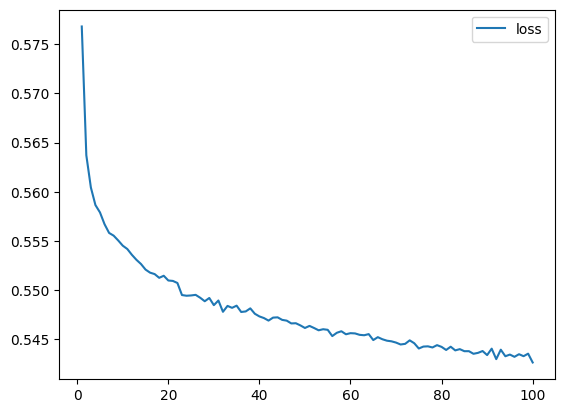

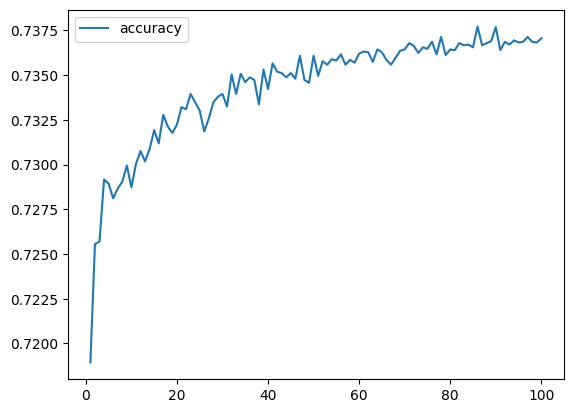

In [16]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model1.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

## Compile, Train and Evaluate the Model (Attempt2)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled[0])
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=60, activation='relu', input_dim=no_of_features))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 60)                2340      
                                                                 
 dense_4 (Dense)             (None, 30)                1830      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,201
Trainable params: 4,201
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Train the model
fit_model2 = nn2.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
804/804 [==============================] - 3s 2ms/step - loss: 0.5773 - accuracy: 0.7154
Epoch 2/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5630 - accuracy: 0.7250
Epoch 3/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5607 - accuracy: 0.7260
Epoch 4/80
804/804 [==============================] - 1s 2ms/step - loss: 0.5582 - accuracy: 0.7262
Epoch 5/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5570 - accuracy: 0.7280
Epoch 6/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5561 - accuracy: 0.7292
Epoch 7/80
804/804 [==============================] - 2s 3ms/step - loss: 0.5556 - accuracy: 0.7303
Epoch 8/80
804/804 [==============================] - 2s 2ms/step - loss: 0.5556 - accuracy: 0.7298
Epoch 9/80
804/804 [==============================] - 1s 2ms/step - loss: 0.5546 - accuracy: 0.7300
Epoch 10/80
804/804 [==============================] - 1s 2ms/step - loss: 0.5540 - accuracy: 0.7307

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5640 - accuracy: 0.7283 - 470ms/epoch - 2ms/step
Loss: 0.5639810562133789, Accuracy: 0.7282798886299133


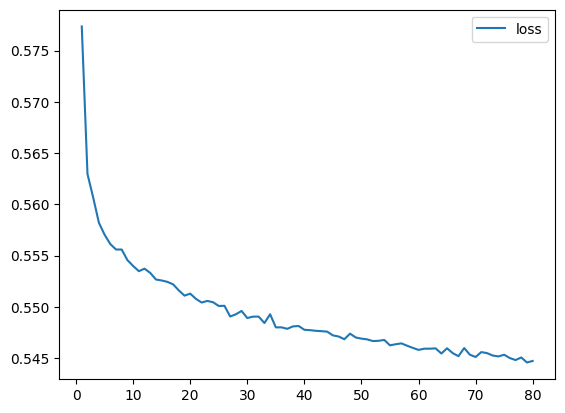

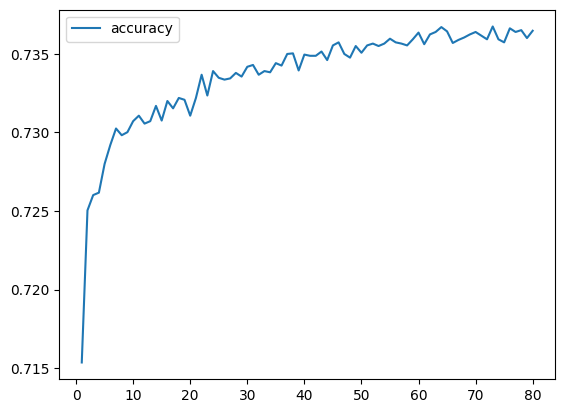

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model2.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

## Compile, Train and Evaluate the Model (Attempt3)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
no_of_features = len(X_train_scaled[0])
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=80, activation='relu', input_dim=no_of_features))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=30, activation='relu'))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                3120      
                                                                 
 dense_7 (Dense)             (None, 30)                2430      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,581
Trainable params: 5,581
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model
nn3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# Train the model
fit_model3 = nn3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5772 - accuracy: 0.7200
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5626 - accuracy: 0.7248
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5598 - accuracy: 0.7260
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5587 - accuracy: 0.7271
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5571 - accuracy: 0.7287
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5565 - accuracy: 0.7292
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5559 - accuracy: 0.7291
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5554 - accuracy: 0.7291
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5548 - accuracy: 0.7307
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5542 - accura

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5680 - accuracy: 0.7284 - 462ms/epoch - 2ms/step
Loss: 0.5679733157157898, Accuracy: 0.728396475315094


In [26]:
# Export our model to HDF5 file (Saving the best from above three attempts)
nn3.save("AlphabetSoupCharity_Optimization.h5")

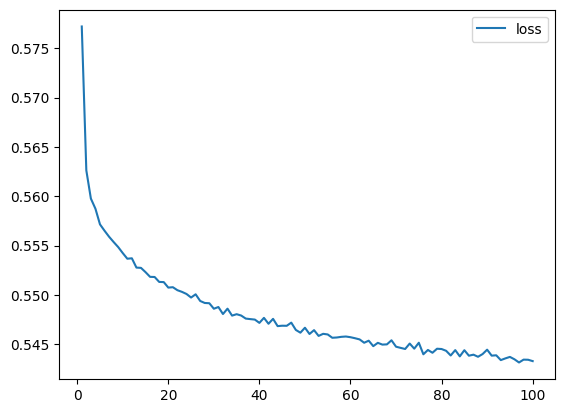

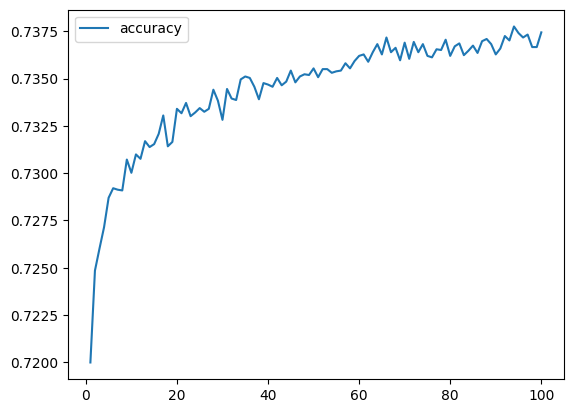

In [27]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model3.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()